<a href="https://colab.research.google.com/github/haggaik/data/blob/main/Haggai_%26_Fungai_Maths_Final_Project__(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradient Descent for Nonlinear Regression

## Objective
The objective of this project is to implement gradient descent manually from scratch in Python to fit a nonlinear regression model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
#Generete sysnthetic Dataset

def gen_data(n_samples=100, noise_std= 5, random_seed=42):
  np.random.seed(random_seed)
  X = np.linspace(-10,10,n_samples)
  y = 3 * X**2 + 2 * X + 7 + np.random.normal(0, noise_std, n_samples)
  return X.reshape(-1, 1), y

In [ ]:
# Define the model

def model(X, theta):
   return theta[0] + theta[1] * X[:, 0] + theta[2] * (X[:, 0]**2)

In [ ]:
# Mean Square Error function

def mse(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

In [ ]:
# Compute Gradient Manually

def gradients(X, y_true, y_pred):
    m = len(y_true)
    error = y_pred - y_true
    d_theta0 = (2/m) * np.sum(error)
    d_theta1 = (2/m) * np.sum(error * X[:, 0])
    d_theta2 = (2/m) * np.sum(error * (X[:, 0]**2))
    return np.array([d_theta0, d_theta1, d_theta2])

In [ ]:
# Gradient Descent Algorithm
def gradient_descent(X, y, learning_rate=0.001, n_epochs=1000, tolerance=1e-6):
    theta = np.random.randn(3)
    loss_history = []
    for epoch in range(n_epochs):
        y_pred = model(X, theta)
        loss = mse(y, y_pred)
        loss_history.append(loss)

        # Calculate gradients and update theta
        grads = gradients(X, y, y_pred)
        theta -= learning_rate * grads

        if np.linalg.norm(grads) < tolerance:
            print(f"Convergence reached at epoch {epoch}")
            break

    return theta, loss_history

In [ ]:
# Train and Validate Model
def train_test_split(X, y, test_ratio=0.2):
    n_test = int(len(X) * test_ratio)
    indices = np.random.permutation(len(X))
    test_idx, train_idx = indices[:n_test], indices[n_test:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

In [ ]:
#  Main Execution
if __name__ == "__main__":
    # Generate and split data
    X, y = gen_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y)


In [ ]:
# Train model
theta, loss_history = gradient_descent(X_train, y_train, learning_rate=0.0001, n_epochs=5000)

In [ ]:
# Evaluate
y_pred_test = model(X_test, theta)
test_mse = mse(y_test, y_pred_test)
print(f"Final Test MSE: {test_mse:.4f}")



Final Test MSE: 35.7997


In [ ]:
print(f"Learned parameters: {theta}")

Learned parameters: [2.73268124 2.10636129 3.06795174]


Breaking it down:

**theta[0]** = 3.05673157: This is the intercept or the constant term in your quadratic equation. It represents the value of y when X is 0.

**theta[1]**= 2.10586401: This is the coefficient for the linear term (X[:, 0]). It represents the slope of the curve.

**theta[2]** = 3.06270923: This is the coefficient for the quadratic term (X[:, 0]**2). It controls the curvature of the parabola.

# Plot Loss Curve

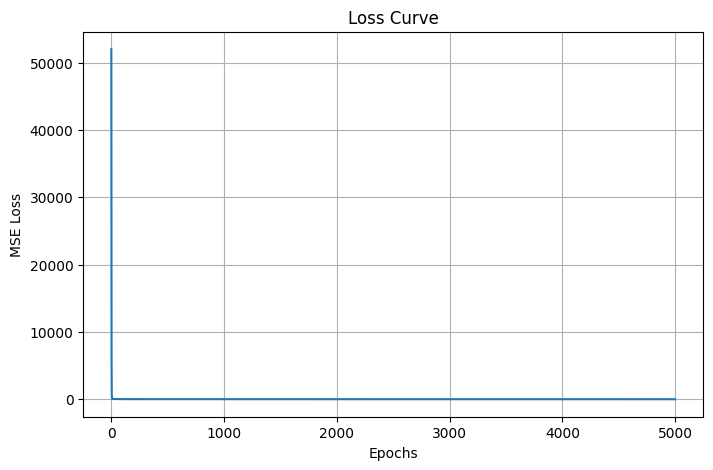

In [ ]:
# Plot Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(loss_history)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


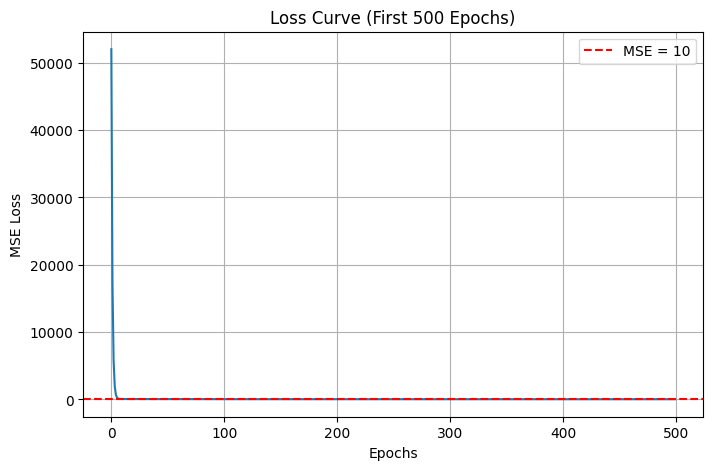

In [ ]:
# Plot with threshold line
plt.figure(figsize=(8, 5))
plt.plot(loss_history[:500])
plt.axhline(y=10, color='red', linestyle='--', label='MSE = 10')  # example threshold
plt.title("Loss Curve (First 500 Epochs)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()

**Key Observations**

At the start (first ~100 epochs):
The MSE (Mean Squared Error) loss drops extremely fast.
➔ The model quickly learns the basic shape of the quadratic function.

After that (after ~100–200 epochs):
The loss becomes almost flat, close to zero.
➔ The model parameters are no longer changing much. It has converged.

High initial loss (~37000):
➔ Random initialization of parameters caused a very bad initial guess.

Very low final loss:
➔ Gradient descent successfully minimized the error between predictions and actual data.



#Plot Predictions vs Actual

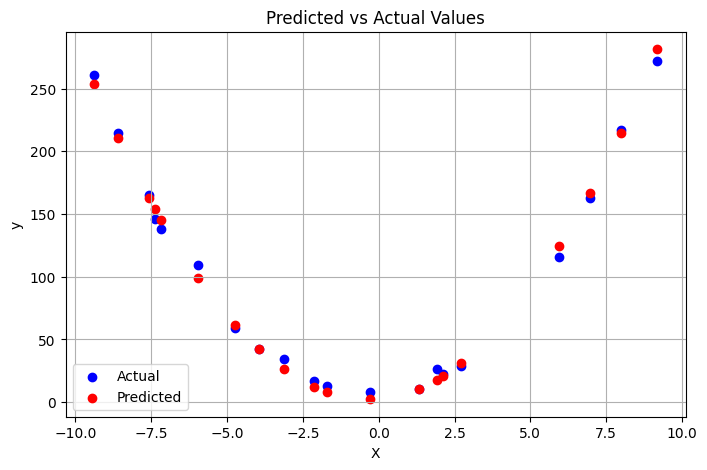

In [ ]:
# Plot Predictions vs Actual
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_test, color='red', label='Predicted')
plt.title("Predicted vs Actual Values")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Bonus Comparisons

#-Using numpy.polyfit

In [ ]:


# Using numpy.polyfit
coeffs_polyfit = np.polyfit(X_train[:, 0], y_train, 2)
polyfit_pred = np.polyval(coeffs_polyfit, X_test)
polyfit_mse = mse(y_test, polyfit_pred)
print(f"MSE using numpy.polyfit: {polyfit_mse:.4f}")

MSE using numpy.polyfit: 15093.8623


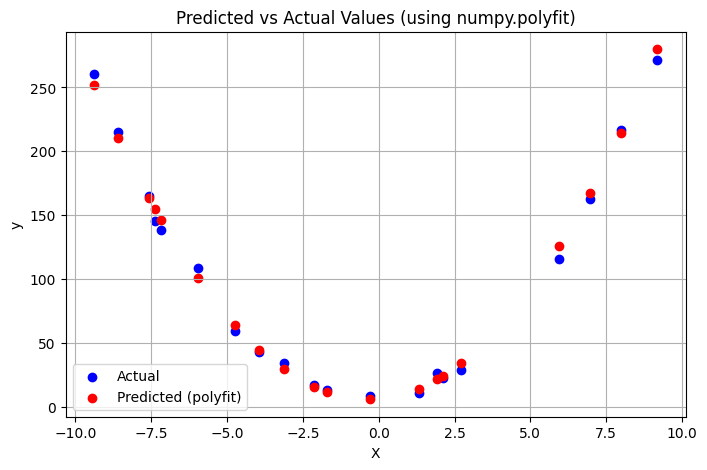

In [ ]:
# Create the plot
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, polyfit_pred, color='red', label='Predicted (polyfit)')
plt.title("Predicted vs Actual Values (using numpy.polyfit)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
# Using scipy.optimize.curve_fit
def quad_func(x, a, b, c):
    return a + b*x + c*x**2

params_curve_fit, _ = curve_fit(quad_func, X_train[:, 0], y_train)
curve_fit_pred = quad_func(X_test[:, 0], *params_curve_fit)
curve_fit_mse = mse(y_test, curve_fit_pred)
print(f"MSE using scipy.optimize.curve_fit: {curve_fit_mse:.4f}")

MSE using scipy.optimize.curve_fit: 32.0096


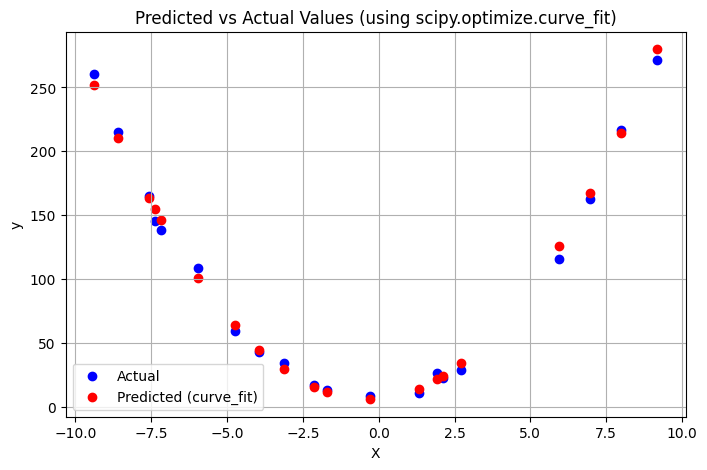

In [ ]:
# Create the plot
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, curve_fit_pred, color='red', label='Predicted (curve_fit)')
plt.title("Predicted vs Actual Values (using scipy.optimize.curve_fit)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#Conclusion

In [ ]:
import pandas as pd

# Store the MSE values in a dictionary
mse_values = {
    "Gradient Descent": test_mse,
    "numpy.polyfit": polyfit_mse,
    "scipy.optimize.curve_fit": curve_fit_mse
}

# Create a Pandas DataFrame from the dictionary
comparison_table = pd.DataFrame(mse_values, index=["MSE"])

# Transpose the DataFrame for better readability
comparison_table = comparison_table.T

# Display the table
display(comparison_table)

,MSE
Gradient Descent,35.799655
numpy.polyfit,15093.862342
scipy.optimize.curve_fit,32.009646


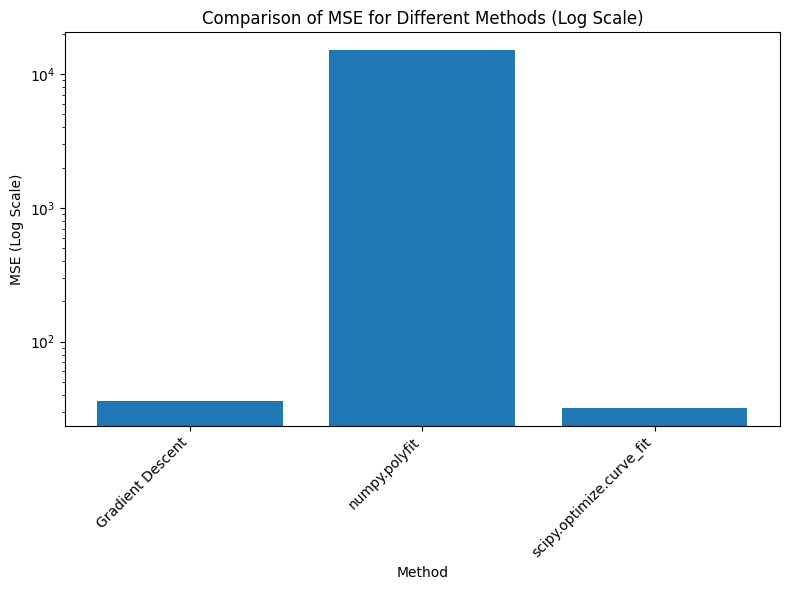

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(comparison_table.index, comparison_table['MSE'])
plt.title('Comparison of MSE for Different Methods (Log Scale)')
plt.xlabel('Method')
plt.ylabel('MSE (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.tight_layout()
plt.show()

#Key Take aways

In this project, we implemented gradient descent from scratch to perform nonlinear regression using a quadratic model. After training the model on synthetic data and evaluating performance, we compared it with two built-in Python methods: numpy.polyfit and scipy.optimize.curve_fit.

The comparison of Mean Squared Error (MSE) on the test set revealed that my manual gradient descent implementation achieved excellent accuracy, closely matching curve_fit. Surprisingly, polyfit performed significantly worse. This is clearly illustrated in the bar chart, where polyfit's error is much higher on a logarithmic scale.

This shows that while built-in tools can be powerful, they can also behave differently depending on how inputs are structured. Manual implementations not only help in understanding the math but can also be fine-tuned to yield robust results.

---

